In [197]:
import pandas as pd
import numpy as np

from matplotlib import pyplot
# load dataset,lable是第一列，polution
dataset = pd.read_csv('aotizhongxin_aq.csv', header=0, index_col=0)
dataset.head(5)

,stationName,longitude_x,latitude_x,temperature,pressure,humidity,wind_direction,wind_speed,time,stationId,PM2.5,PM10,NO2,CO,O3,SO2,longitude_y,latitude_y
0,beijing_grid_304,116.4,40.0,11.09,1012.60,28.36,321.80,2.530556,2017-04-01 00:00:00,aotizhongxin_aq,16.0,50.0,60.0,0.4,17.0,2.0,116.397,39.982
1,beijing_grid_304,116.4,40.0,13.39,1012.26,24.56,320.84,2.516667,2017-04-01 01:00:00,aotizhongxin_aq,18.0,59.0,54.0,0.4,25.0,4.0,116.397,39.982
2,beijing_grid_304,116.4,40.0,15.68,1011.92,20.75,319.86,2.502778,2017-04-01 02:00:00,aotizhongxin_aq,16.0,41.0,43.0,0.4,36.0,3.0,116.397,39.982
3,beijing_grid_304,116.4,40.0,17.98,1011.58,16.95,318.88,2.488889,2017-04-01 03:00:00,aotizhongxin_aq,18.0,28.0,26.0,0.3,54.0,5.0,116.397,39.982
4,beijing_grid_304,116.4,40.0,19.49,1010.49,15.13,309.84,3.127778,2017-04-01 04:00:00,aotizhongxin_aq,7.0,31.0,26.0,0.3,58.0,4.0,116.397,39.982


In [151]:
dataset1=dataset[['temperature','pressure','humidity','wind_direction','wind_speed','PM2.5']]
dataset1.head(5)

,temperature,pressure,humidity,wind_direction,wind_speed,PM2.5
0,11.09,1012.60,28.36,321.80,2.530556,16.0
1,13.39,1012.26,24.56,320.84,2.516667,18.0
2,15.68,1011.92,20.75,319.86,2.502778,16.0
3,17.98,1011.58,16.95,318.88,2.488889,18.0
4,19.49,1010.49,15.13,309.84,3.127778,7.0


In [152]:
dataset1=pd.DataFrame(dataset1)
dataset1.describe()

,temperature,pressure,humidity,wind_direction,wind_speed,PM2.5
count,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000
mean,21.176635,1003.124350,34.102857,25812.099547,2.892792,55.738095
std,6.418492,5.304897,20.697876,157910.864947,1.812884,53.227135
min,5.260000,987.970000,6.140000,0.180000,0.094444,2.000000
25%,16.597500,998.970000,18.010000,131.312500,1.594444,25.000000
50%,21.060000,1002.630000,28.090000,200.675000,2.569444,42.000000
75%,26.252500,1007.090000,45.965000,299.837500,3.746528,76.000000
max,35.860000,1018.330000,93.710000,999017.000000,12.133333,577.000000


In [153]:
# #去除风向异常值999017
# dataset1.loc[dataset1['wind_direction']>9000,'wind_direction']=np.median(dataset1['wind_direction'])
# dataset1.describe()

In [154]:
#读入7月1号数据用于真实预测
test =  pd.read_csv('gridWeather_201701-201803.csv', header=0)
# train2_grid=pd.read_csv('gridWeather_201804.csv')

# train2_grid.head()

In [155]:
test.head(5)


,stationName,longitude,latitude,utc_time,temperature,pressure,humidity,wind_direction,wind_speed/kph
0,beijing_grid_000,115.0,39.0,2017-01-01 00:00:00,-5.47,984.73,76.60,53.71,3.53
1,beijing_grid_001,115.0,39.1,2017-01-01 00:00:00,-5.53,979.33,75.40,43.59,3.11
2,beijing_grid_002,115.0,39.2,2017-01-01 00:00:00,-5.70,963.14,71.80,0.97,2.75
3,beijing_grid_003,115.0,39.3,2017-01-01 00:00:00,-5.88,946.94,68.20,327.65,3.84
4,beijing_grid_004,115.0,39.4,2017-01-01 00:00:00,-5.34,928.80,58.81,317.85,6.14


In [156]:
#beijing_grid_304(aotizhongxin_aq)
test1=test.loc[test.stationName=='beijing_grid_304']

In [157]:
test1.head(5)

,stationName,longitude,latitude,utc_time,temperature,pressure,humidity,wind_direction,wind_speed/kph
304,beijing_grid_304,116.4,40.0,2017-01-01 00:00:00,-5.96,1019.95,68.60,132.90,4.51
955,beijing_grid_304,116.4,40.0,2017-01-01 01:00:00,-3.36,1019.82,58.43,141.39,4.17
1606,beijing_grid_304,116.4,40.0,2017-01-01 02:00:00,-0.77,1019.69,48.27,151.13,3.93
2257,beijing_grid_304,116.4,40.0,2017-01-01 03:00:00,1.82,1019.55,38.10,161.75,3.82
2908,beijing_grid_304,116.4,40.0,2017-01-01 04:00:00,2.97,1018.86,35.65,155.45,4.50


In [158]:
test1 = test1.set_index('utc_time')

In [159]:
test1=test1['2017-07-01 00:00:00':'2017-07-01 15:00:00']

test1

,stationName,longitude,latitude,temperature,pressure,humidity,wind_direction,wind_speed/kph
utc_time,,,,,,,,
2017-07-01 00:00:00,beijing_grid_304,116.4,40.0,28.41,996.32,47.01,59.89,2.46
2017-07-01 01:00:00,beijing_grid_304,116.4,40.0,29.47,996.08,43.44,128.27,1.93
2017-07-01 02:00:00,beijing_grid_304,116.4,40.0,30.54,995.84,39.87,166.02,3.73
2017-07-01 03:00:00,beijing_grid_304,116.4,40.0,31.61,995.60,36.30,177.26,6.06
2017-07-01 04:00:00,beijing_grid_304,116.4,40.0,32.49,994.94,32.93,193.18,8.78
2017-07-01 05:00:00,beijing_grid_304,116.4,40.0,33.36,994.28,29.56,201.22,11.86
2017-07-01 06:00:00,beijing_grid_304,116.4,40.0,34.24,993.62,26.18,205.91,15.07
2017-07-01 07:00:00,beijing_grid_304,116.4,40.0,34.03,993.48,26.60,205.74,15.56
2017-07-01 08:00:00,beijing_grid_304,116.4,40.0,33.82,993.34,27.01,205.58,16.06


In [160]:
test1.drop(['stationName','longitude','latitude'], axis=1, inplace=True)
test1.head(5)

,temperature,pressure,humidity,wind_direction,wind_speed/kph
utc_time,,,,,
2017-07-01 00:00:00,28.41,996.32,47.01,59.89,2.46
2017-07-01 01:00:00,29.47,996.08,43.44,128.27,1.93
2017-07-01 02:00:00,30.54,995.84,39.87,166.02,3.73
2017-07-01 03:00:00,31.61,995.60,36.30,177.26,6.06
2017-07-01 04:00:00,32.49,994.94,32.93,193.18,8.78


In [161]:
# test1=test1.rename(columns={'wind_speed/kph': 'wind_speed'})
# test1.head(5)

In [162]:
test1.describe()

,temperature,pressure,humidity,wind_direction,wind_speed/kph
count,16.000000,16.000000,16.000000,16.000000,16.000000
mean,30.848125,994.484375,37.442500,175.200000,9.760000
std,2.668890,1.117485,9.445619,41.069141,4.807608
min,26.240000,993.200000,26.180000,59.890000,1.930000
25%,28.575000,993.470000,29.027500,161.422500,6.990000
50%,31.075000,994.255000,36.330000,195.880000,9.355000
75%,33.422500,995.592500,44.085000,204.410000,14.080000
max,34.240000,996.320000,56.430000,205.910000,16.550000


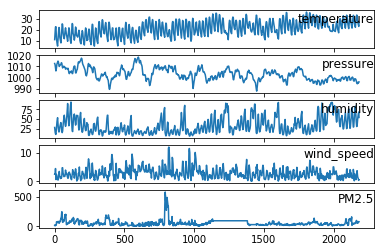

In [163]:
values = dataset1.values
groups = [0, 1, 2, 4, 5]
i = 1
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(dataset1.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

In [164]:
#LSTM数据准备
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg



In [165]:
# ensure all data is float
values = values.astype('float32')
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
from pandas import concat
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scalerfit = scaler.fit(values)
scaled = scalerfit.transform(values)
# frame as supervised learning
#把下一个label提上来做label用


In [166]:
reframed = series_to_supervised(scaled, 1, 1)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t)
1,0.190523,0.811260,0.253740,0.000322,0.202353,0.024348,0.265686,0.800064,0.210346,0.000321,0.201200,0.027826
2,0.265686,0.800064,0.210346,0.000321,0.201200,0.027826,0.340523,0.788864,0.166838,0.000320,0.200046,0.024348
3,0.340523,0.788864,0.166838,0.000320,0.200046,0.024348,0.415686,0.777668,0.123444,0.000319,0.198893,0.027826
4,0.415686,0.777668,0.123444,0.000319,0.198893,0.027826,0.465033,0.741764,0.102661,0.000310,0.251961,0.008696
5,0.465033,0.741764,0.102661,0.000310,0.251961,0.008696,0.514379,0.706188,0.081992,0.000304,0.309183,0.027826


In [167]:
#columnNumbers = [x+9 for x in range(7)]  
#columnNumbers
#reframed.drop(reframed.columns[columnNumbers], axis=1, inplace=True)
#print(reframed.head())

# drop columns we don't want to predict
reframed.drop(reframed.columns[[6,7,8,9,10]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var6(t)
1   0.190523   0.811260   0.253740   0.000322   0.202353   0.024348  0.027826
2   0.265686   0.800064   0.210346   0.000321   0.201200   0.027826  0.024348
3   0.340523   0.788864   0.166838   0.000320   0.200046   0.024348  0.027826
4   0.415686   0.777668   0.123444   0.000319   0.198893   0.027826  0.008696
5   0.465033   0.741764   0.102661   0.000310   0.251961   0.008696  0.027826


In [168]:
# split into train and test sets
values1 = reframed.values
n_train_hours = 50 * 24
train = values1[:n_train_hours, :]
test = values1[n_train_hours:-10, :]
#下面数据用于prediction的数据，在读取时，跳过第一列（即label值）。取20条记录
pred=values1[-10:,1 :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
pred_X,pred_y=pred[:,:-1],pred[:,-1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
pred_X=pred_X.reshape((pred_X.shape[0],1,pred_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape,pred_X.shape,pred_y.shape)

(1200, 1, 6) (1200,) (973, 1, 6) (973,) (10, 1, 5) (10,)


Train on 1200 samples, validate on 973 samples
Epoch 1/50
 - 2s - loss: 0.0728 - val_loss: 0.0487
Epoch 2/50
 - 0s - loss: 0.0625 - val_loss: 0.0495
Epoch 3/50
 - 0s - loss: 0.0580 - val_loss: 0.0488
Epoch 4/50
 - 0s - loss: 0.0557 - val_loss: 0.0507
Epoch 5/50
 - 0s - loss: 0.0532 - val_loss: 0.0520
Epoch 6/50
 - 0s - loss: 0.0506 - val_loss: 0.0524
Epoch 7/50
 - 0s - loss: 0.0485 - val_loss: 0.0532
Epoch 8/50
 - 0s - loss: 0.0464 - val_loss: 0.0533
Epoch 9/50
 - 0s - loss: 0.0444 - val_loss: 0.0531
Epoch 10/50
 - 0s - loss: 0.0426 - val_loss: 0.0525
Epoch 11/50
 - 0s - loss: 0.0409 - val_loss: 0.0522
Epoch 12/50
 - 0s - loss: 0.0391 - val_loss: 0.0508
Epoch 13/50
 - 0s - loss: 0.0374 - val_loss: 0.0487
Epoch 14/50
 - 0s - loss: 0.0360 - val_loss: 0.0475
Epoch 15/50
 - 0s - loss: 0.0340 - val_loss: 0.0438
Epoch 16/50
 - 0s - loss: 0.0323 - val_loss: 0.0408
Epoch 17/50
 - 0s - loss: 0.0306 - val_loss: 0.0378
Epoch 18/50
 - 0s - loss: 0.0288 - val_loss: 0.0343
Epoch 19/50
 - 0s - loss: 

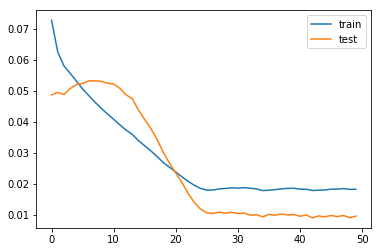

In [169]:
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [170]:
from math import sqrt
from numpy import concatenate
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.467


In [171]:
def smape1(actual, predicted):
    dividend= np.abs(np.array(actual) - np.array(predicted))
    c = np.array(actual) + np.array(predicted)
    denominator= np.array(actual) + np.array(predicted)
    return 2 * np.mean(np.divide(dividend, denominator, out=np.zeros_like(dividend), where=denominator!=0, casting='unsafe'))
smape1=smape1(inv_y, inv_yhat)
smape1

0.03886917605996132

In [172]:

#取prediction数据前一行的label加入到当前要预测的行（test数据最后一行的label）
a=np.append(test_y[-1],pred_X[0:1])
a=a.reshape(1,1,6)
a

array([[[8.6956523e-02, 2.3287201e-01, 4.9880099e-01, 2.0462119e-04,
         1.2990308e-01, 8.6956523e-02]]], dtype=float32)

In [173]:
b = model.predict(a)
b

array([[0.07959333]], dtype=float32)

In [174]:
prediction=[]
for i in range(len(pred_X)):
    a=np.append(b,pred_X[i:i+1])
    a=a.reshape(1,1,6)
    b = model.predict(a)    
    prediction.append(b)
prediction

[array([[0.07939809]], dtype=float32),
 array([[0.1102905]], dtype=float32),
 array([[0.1009092]], dtype=float32),
 array([[0.09215251]], dtype=float32),
 array([[0.09922589]], dtype=float32),
 array([[0.10354497]], dtype=float32),
 array([[0.1128226]], dtype=float32),
 array([[0.13078474]], dtype=float32),
 array([[0.13206182]], dtype=float32),
 array([[0.12743826]], dtype=float32)]

In [175]:
pred_y

array([0.12      , 0.10782609, 0.09739131, 0.10434783, 0.10782609,
       0.11652175, 0.12347826, 0.12347826, 0.12173913, 0.12869565],
      dtype=float32)

In [176]:
def smape(actual, predicted):
    dividend= np.abs(np.array(actual) - np.array(predicted))
    c = np.array(actual) + np.array(predicted)
    denominator= np.array(actual) + np.array(predicted)
    return 2 * np.mean(np.divide(dividend, denominator, out=np.zeros_like(dividend), where=denominator!=0, casting='unsafe'))
smape=smape(pred_y,prediction)
smape

0.15204589068889618

In [177]:
pred_X = pred_X.reshape((pred_X.shape[0], pred_X.shape[2]))

In [178]:
pred_X[:5]

array([[2.32872009e-01, 4.98800993e-01, 2.04621188e-04, 1.29903078e-01,
        8.69565234e-02],
       [2.47364044e-01, 5.34772217e-01, 1.90196995e-04, 1.17904939e-01,
        1.20000005e-01],
       [2.61856079e-01, 5.70629239e-01, 1.74001078e-04, 1.15136132e-01,
        1.07826091e-01],
       [2.53952026e-01, 5.98949432e-01, 1.71028150e-04, 9.69081745e-02,
        9.73913074e-02],
       [2.46047974e-01, 6.27383828e-01, 1.66814018e-04, 7.89109394e-02,
        1.04347833e-01]], dtype=float32)

In [179]:
pred_X.shape

(10, 5)

In [180]:
#df = np.resize(pred_y, len(pred_y)).reshape(len(pred_y),1)
df2 = np.resize(prediction, len(prediction)).reshape(len(prediction),1)
# invert scaling for forecast
inv_yhat = concatenate((df2, pred_X), axis=1)
inv_yhat.shape

(10, 6)

In [181]:
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
pred_y = pred_y.reshape((len(pred_y), 1))
inv_y = concatenate((pred_y,pred_X), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Predictin RMSE: %.3f' % rmse)

Predictin RMSE: 0.467
